In [28]:
#importing our data in drive
from google.colab import drive
 
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [24]:
#import libraries sesuai kebutuhan

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils.multiclass import unique_labels

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

## **Data Exploration** 
Melihat data kita seperti apa, bagaimana isinya, apa saja pathnya, dll

In [29]:
print(os.listdir('/content/drive/MyDrive/dataset/train/'))

['Serai', 'Kunyit', 'Jahe', 'Bawang Putih', 'Mengkudu', 'Kumis Kucing', 'Adas', 'Akar Alang Alang', 'Daun Katuk', 'Daun Salam', 'Kapulaga', 'Lidah Buaya', 'Meniran', 'Miana', 'Pare', 'Pegagan', 'Rosela', 'Seledri', 'Temu Kunci', 'Valerian']


In [31]:
print('total training adas images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Adas')))
print('total training akar alang-alang images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Akar Alang Alang')))
print('total training bawang putih images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Bawang Putih')))
print('total training daun salam images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Daun Salam')))
print('total training daun katuk images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Daun Katuk')))
print('total training jahe images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Jahe')))
print('total training kapulaga images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Kapulaga')))
print('total training kumis kucing images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Kumis Kucing')))
print('total training kunyit images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Kunyit')))
print('total training lidah buaya images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Lidah Buaya')))
print('total training mengkudu images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Mengkudu')))
print('total training meniran images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Meniran')))
print('total training miana images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Miana')))
print('total training pare images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Pare')))
print('total training pegagan images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Pegagan')))
print('total training rosela images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Rosela')))
print('total training seledri images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Seledri')))
print('total training serai images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Serai')))
print('total training temu kunci images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Temu Kunci')))
print('total training valerian images: ', len(os.listdir('/content/drive/MyDrive/dataset/train/Valerian')))

total training adas images:  353
total training akar alang-alang images:  389
total training bawang putih images:  387
total training daun salam images:  346
total training daun katuk images:  430
total training jahe images:  333
total training kapulaga images:  422
total training kumis kucing images:  424
total training kunyit images:  418
total training lidah buaya images:  473
total training mengkudu images:  417
total training meniran images:  390
total training miana images:  416
total training pare images:  416
total training pegagan images:  370
total training rosela images:  431
total training seledri images:  337
total training serai images:  346
total training temu kunci images:  453
total training valerian images:  429


## **Image Data Generator**
Augmentasi data gambar dan membuat label dari directory

In [32]:
#membuat training-validation directory, data generator

TRAINING_DIR = '/content/drive/MyDrive/dataset/train'
training_datagen = ImageDataGenerator(rescale = 1/255)

VALIDATION_DIR = '/content/drive/MyDrive/dataset/val'
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (299, 299),
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (299, 299),
    class_mode = 'categorical'
)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Found 7975 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


## **Modelling with X-CEPTION**

Menggunakan pre-trained model Xception. Kemudian disimpan dalam file .h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Pretrained Model + Fine Tuning (https://keras.io/api/applications/)
# create the base pre-trained model : Xception + global spatial average pooling
base_model = Xception(weights='imagenet', input_shape = (299,299,3), include_top=False, pooling = 'avg')

# add a global spatial average pooling layer
x = base_model.output
# let's add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a logistic layer -- 20 classes
predictions = Dense(20, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

# train the model on the new data for a few epochs
model.fit(train_generator, epochs=4, validation_data = validation_generator, verbose = 1)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from Xception. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the last inception blocks, i.e. we will freeze
# the first 125 layers and unfreeze the rest:
for layer in model.layers[:125]:
    layer.trainable = False
for layer in model.layers[125:]:
    layer.trainable = True
# we need to recompile the model for these modifications to take effect
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit(train_generator, epochs=4, validation_data = validation_generator, verbose = 1)

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/4
  3/250 [..............................] - ETA: 52:52 - loss: 3.0005 - accuracy: 0.1094

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 3469s 14s/step - loss: 1.5034 - accuracy: 0.5837 - val_loss: 6.0519 - val_accuracy: 0.1283
Epoch 2/4
250/250 [==============================] - ETA: 0s - loss: 0.5914 - accuracy: 0.8383 

In [ ]:
model.save("model_xception_herbify.h5")

## **Evaluation**

Evaluasi model dengan visualisasi grafik akurasi dan simulasi model 

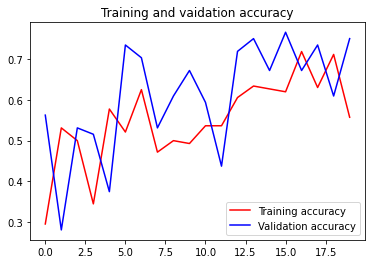

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

Saving 00000001.jpg to 00000001.jpg


ValueError: ignored

## **Convert ke .tflite**

In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="model_xception_herbify.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model_xception_herbify.tflite', 'wb') as f:
  f.write(tflite_model)

***NOTES!***

Kita belum pakai fitur Callback untuk fit-nya.. (hapus aja note ini kalau sudah ada fitur Callback yang dibuat)